[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W13/W13P3.ipynb)



In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import requests

In [3]:
def download_data():  ### This dude will download the dataset from the directory directly!
  url = "https://raw.githubusercontent.com/y-akbal/ADS523_TS /main/W6/pm10.csv"
  res = requests.get(url, allow_redirects=True)
  with open('pm10.csv','wb') as file:
    file.write(res.content)

download_data()

In [7]:
data = pd.read_csv("pm10.csv").iloc[:3000, -1]

In [16]:
f = lambda x: x.replace(",", ".")
data = pd.to_numeric(data.apply(f))

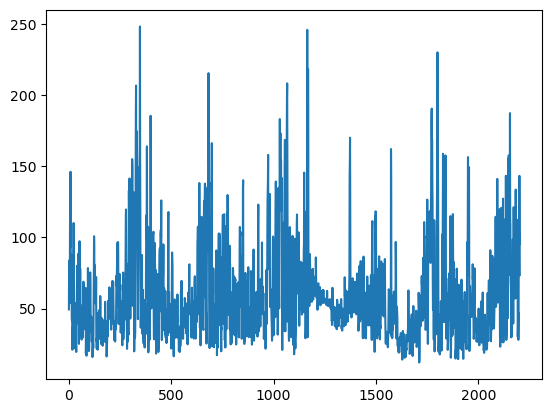

In [17]:
plt.plot(data)

In [31]:
def patch(ts:np.ndarray, m:int = 50, p:float = 0.5)->np.ndarray:
    L = []
    for i in range(ts.shape[0]-m-1):
        var = (abs(ts[:i+m].std(ddof = 1)-ts[:i+1+m].std(ddof = 1)))**p
        L.append(var)
    return np.asarray(L)
         
    

In [32]:
ts_ = patch(data)

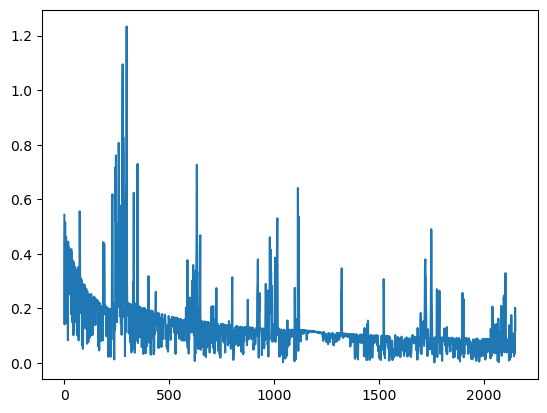

In [33]:
plt.plot(ts_)

In [38]:
np.where(ts_>0.8)[0]+50

array([309, 327, 328, 331, 347], dtype=int64)